<a href="https://colab.research.google.com/github/okada-t-rafael/time_series_data_analysis/blob/master/45_Statsmodels_Holt_Winters_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [2]:
from google.colab import files
files.upload()

Saving airline_passengers.csv to airline_passengers.csv


{'airline_passengers.csv': b'"Month","Thousands of Passengers"\n"1949-01",112\n"1949-02",118\n"1949-03",132\n"1949-04",129\n"1949-05",121\n"1949-06",135\n"1949-07",148\n"1949-08",148\n"1949-09",136\n"1949-10",119\n"1949-11",104\n"1949-12",118\n"1950-01",115\n"1950-02",126\n"1950-03",141\n"1950-04",135\n"1950-05",125\n"1950-06",149\n"1950-07",170\n"1950-08",170\n"1950-09",158\n"1950-10",133\n"1950-11",114\n"1950-12",140\n"1951-01",145\n"1951-02",150\n"1951-03",178\n"1951-04",163\n"1951-05",172\n"1951-06",178\n"1951-07",199\n"1951-08",199\n"1951-09",184\n"1951-10",162\n"1951-11",146\n"1951-12",166\n"1952-01",171\n"1952-02",180\n"1952-03",193\n"1952-04",181\n"1952-05",183\n"1952-06",218\n"1952-07",230\n"1952-08",242\n"1952-09",209\n"1952-10",191\n"1952-11",172\n"1952-12",194\n"1953-01",196\n"1953-02",196\n"1953-03",236\n"1953-04",235\n"1953-05",229\n"1953-06",243\n"1953-07",264\n"1953-08",272\n"1953-09",237\n"1953-10",211\n"1953-11",180\n"1953-12",201\n"1954-01",204\n"1954-02",188\n"1954-

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [5]:
df = df.dropna()

In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
df.index.freq = 'MS'

In [8]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [9]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
span = 12
alpha = 2 / (span + 1)

In [12]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [13]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [14]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [16]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [17]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [18]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [19]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


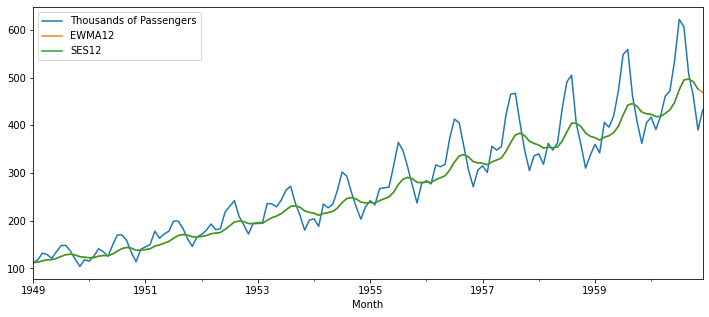

In [22]:
df.plot(figsize=(12, 5))

In [23]:
model = ExponentialSmoothing(df['Thousands of Passengers'], trend='add')
# model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul')
fitted_model = model.fit()
df['DES_add_12'] = fitted_model.fittedvalues.shift(-1)

In [24]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336233
1949-02-01,118,112.923077,112.923077,120.336233
1949-03-01,132,115.857988,115.857988,134.336233
1949-04-01,129,117.879836,117.879836,131.336233
1949-05-01,121,118.359861,118.359861,123.336233


In [25]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

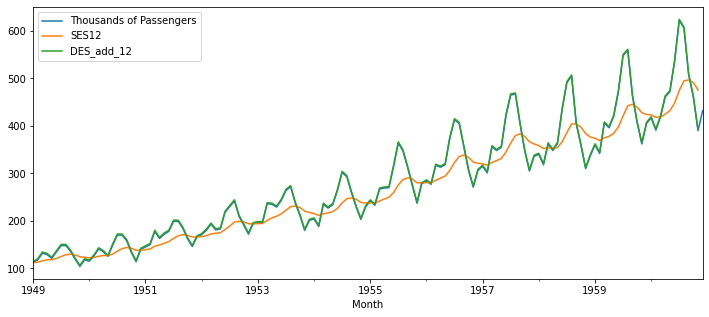

In [26]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot(figsize=(12, 5))

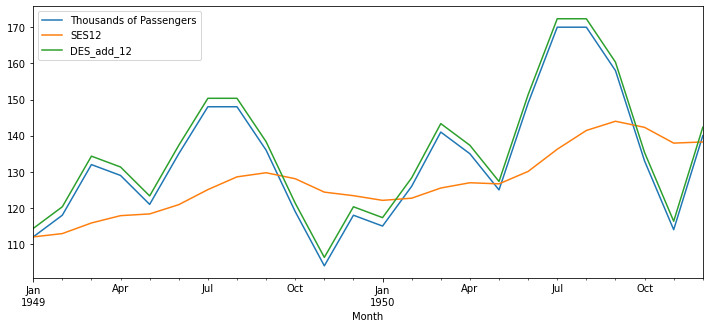

In [27]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12, 5))

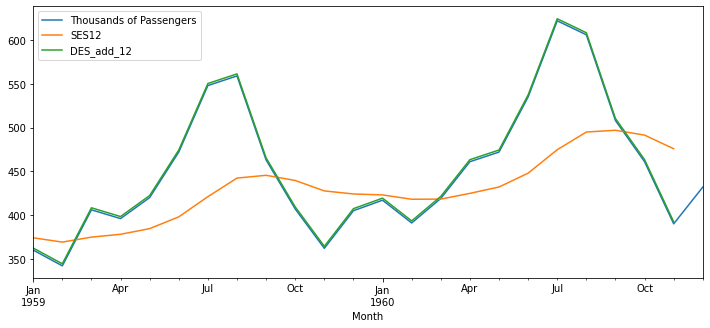

In [28]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12, 5))

In [32]:
model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12)
fitted_model = model.fit()
df['TES_mul_12'] = fitted_model.fittedvalues

In [34]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,TES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336233,111.583236
1949-02-01,118,112.923077,112.923077,120.336233,118.839294
1949-03-01,132,115.857988,115.857988,134.336233,133.327416
1949-04-01,129,117.879836,117.879836,131.336233,127.915388
1949-05-01,121,118.359861,118.359861,123.336233,120.978320


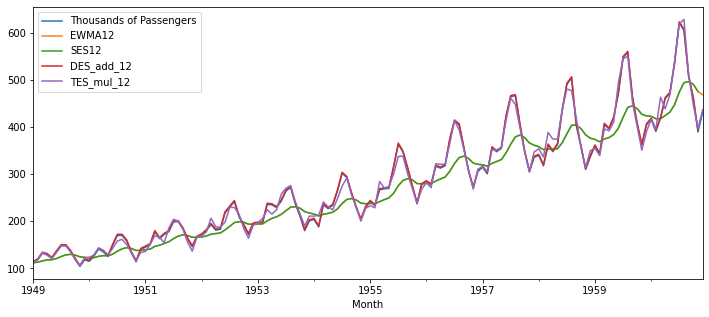

In [35]:
df.plot(figsize=(12, 5))

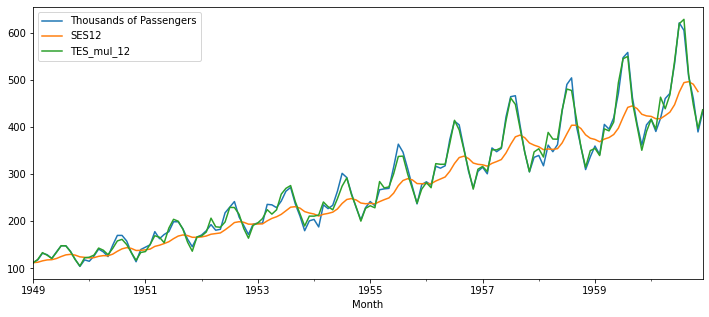

In [36]:
df[['Thousands of Passengers', 'SES12', 'TES_mul_12']].plot(figsize=(12, 5))

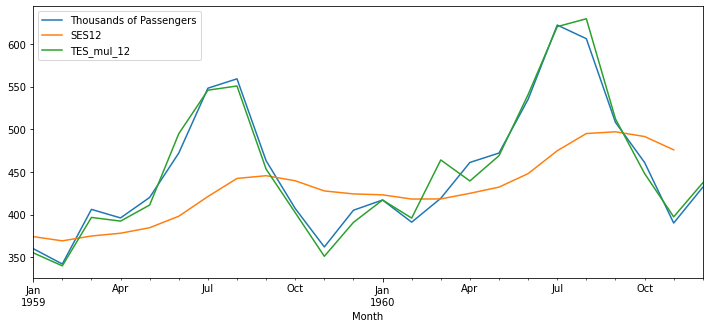

In [37]:
df[['Thousands of Passengers', 'SES12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12, 5))